# **Determine intensities of 650, 520, and 450 nm wavelengths to scan an image across the retina using a virtual retinal display.**

### Initialization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Make a path for the download and upload files
path = '/content/drive/MyDrive/2024 Spring/Illumination Optics/Project/Hoskin_Final/'

### Upload image (pull from Google Drive)

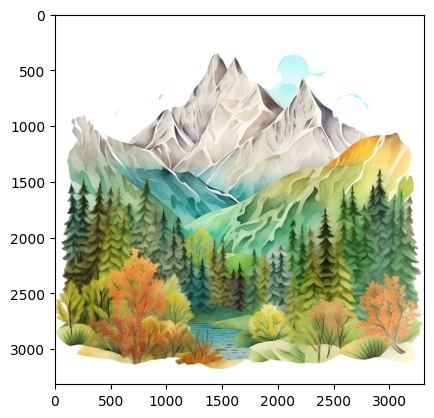

In [ ]:
# JPG files compress and distort color, so I will default to PNG image files
# https://www.cleanpng.com/png-autumn-foliage-7848132/download-png.html
image_path = path + 'autumn.png'

# convert transparency from .png file to white background
img = Image.open(image_path).convert("RGBA")
white_bg = Image.new("RGBA", img.size, (255, 255, 255, 255))
img = Image.alpha_composite(white_bg, img).convert("RGB")

# open image
plt.imshow(img)
plt.show()

### Convert image into bins (match bin size resolution)

In [ ]:
# Make function to convert image into squared bins
def image_to_bins(img, num_bins):
    img_resized = img.resize((num_bins, num_bins))
    rgb_array = np.array(img_resized)  # shape: (num_bins, num_bins, 3)
    return rgb_array

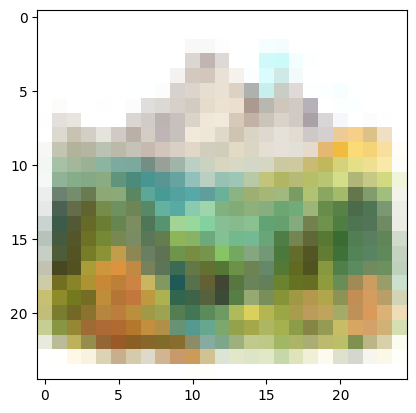

In [122]:
binned_img = image_to_bins(img, 25)
plt.imshow(binned_img.astype(np.uint8))
plt.show()

### Identify color in each bin (0:255, 0:255, 0:255)

In [123]:
# Make function to convert each bin into RGB vector
def bins_to_rgb(rgb_array):
    h, w, _ = rgb_array.shape
    return rgb_array

In [124]:
rgb_vectors = bins_to_rgb(binned_img)
# print(rgb_vectors)

In [125]:
# Normalize all the vectors to 1
rgb_normalized = rgb_vectors / 255.0
rgb_normalized

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.90588235, 0.91764706, 0.8627451 ],
        [0.7254902 , 0.7372549 , 0.58823529],
        [0.74509804, 0

### Determine the initial transmittance screen of laser

In [126]:
# Convert wavelength to V(Lambda)
def V_lambda(wavelength_nm):
    # Gaussian approximation of the photopic luminous efficiency curve
    return np.exp(-0.5 * ((wavelength_nm - 555) / 60) ** 2)

In [127]:
# Input wavelengths of lasers
red_nm = 650
green_nm = 520
blue_nm = 480

# Calculate the V(Lambda) of lasers
red = V_lambda(red_nm)
green = V_lambda(green_nm)
blue = V_lambda(blue_nm)

max_intensity = 1 #mW
# Normalize the three values around 1mW (This is the max intensity that can go in the eye)
total = red + green + blue
red_mW = red / total * max_intensity
green_mW = green / total * max_intensity
blue_mW = blue / total * max_intensity
print('The intensities listed below are the final intensities for white light. \nThis also means they are the max intensities hitting the eye.\n')
print(f'Red Intensity:{red_mW}mW \nGreen Intensity: {green_mW}mW \nBlue Intensity: {blue_mW}mW \n')

# Check to make sure all lasers add up to 1
print(red_mW + green_mW + blue_mW)

The intensities listed below are the final intensities for white light. 
This also means they are the max intensities hitting the eye.

Red Intensity:0.17991872370133036mW 
Green Intensity: 0.5315719431152802mW 
Blue Intensity: 0.2885093331833894mW 

1.0


In [128]:
# Input Starting Intensities (also in mW)
red_start_mW = 10
green_start_mW = 10
blue_start_mW = 80

# Red transmits through 2 mirrors with 90% Transmittance
red_mirror_mW = red_start_mW * 0.9 * 0.9
# Green transmits trhough 1 mirror with 95% Reflectance and another with 90% Transmittance
green_mirror_mW = green_start_mW * 0.95 * 0.9
# Blue transmits through 1 mirror with 95% Reflectance
blue_mirror_mW = blue_start_mW * 0.95

In [129]:
# color_mirror * color_trans (transmittance Screen) = color_intensity
# therefore, color_AS = color_intensity / color_mirror

red_trans = red_mW / red_mirror_mW * 100
green_trans = green_mW / green_mirror_mW * 100
blue_trans = blue_mW / blue_mirror_mW * 100
print('Before the lasers hit the Dichroic Mirrors, they will be transmitted through a screen the minimize the intensity. \nThe transmittance of the red, green, and blue screens are listed below:')
print(f'{red_trans}%\n{green_trans}%\n{blue_trans}%\n')

Before the lasers hit the Dichroic Mirrors, they will be transmitted through a screen the minimize the intensity. 
The transmittance of the red, green, and blue screens are listed below:
2.2212188111275353%
6.217215708950645%
0.37961754366235445%



### Change the starting intensities of the lasers to match the scanning pattern


In [130]:
# Multiply the first column vectors by red
rgb_normalized[:,:,0] *= red_start_mW
# Multiply the second column vectors by green
rgb_normalized[:,:,1] *= green_start_mW
# # Multiply the third column vectors by blue
rgb_normalized[:,:,2] *= blue_start_mW

In [133]:
rgb_normalized

array([[[10.        , 10.        , 80.        ],
        [10.        , 10.        , 80.        ],
        [10.        , 10.        , 80.        ],
        ...,
        [10.        , 10.        , 80.        ],
        [10.        , 10.        , 80.        ],
        [10.        , 10.        , 80.        ]],

       [[10.        , 10.        , 80.        ],
        [10.        , 10.        , 80.        ],
        [10.        , 10.        , 80.        ],
        ...,
        [10.        , 10.        , 80.        ],
        [10.        , 10.        , 80.        ],
        [10.        , 10.        , 80.        ]],

       [[10.        , 10.        , 80.        ],
        [10.        , 10.        , 80.        ],
        [10.        , 10.        , 80.        ],
        ...,
        [10.        , 10.        , 80.        ],
        [10.        , 10.        , 80.        ],
        [10.        , 10.        , 80.        ]],

       ...,

       [[ 9.05882353,  9.17647059, 69.01960784],
        [ 7